# Práctica 9

David Cruz Sánchez

Los árboles de decisión son modelos de clasificación y regresión que como su nombre indica se basan en una estructura de árbol, donde en cada nodo se particionan las muestra dependiendo del valor de una característica. La elección de la característica para realizar la partición se basa en una medida de impureza que mide cómo de homogéneas son las particiones resultantes con respecto a la clase. A continuación, probaremos diferentes formas de usarlos en la siguiente práctica:

Comenzamos importando los paquetes necesarios:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from comite import Apilado, BosqueAleatorio
from sklearn.preprocessing import LabelEncoder


El conjunto de datos a utilizar en esta práctica sera el Wisconsin Diagnostic Breast Cancer. Son datos correspondientes a un problema de clasificación de muestras de células como malignas o benignas que viene codificado como una M o una B en la columna Diagnosis. El conjunto de datos consta de 569 muestras de las que además de la información correspondiente al diagnóstico también tiene el identificador de la muestra (ID number) y 30 características numéricas que corresponden con la media, el error estándar y el peor valor para 10 medidas obtenidas a partir de los núcleos de las células. La distribución de muestras por clases es de 357 benignas y 212 malignas.

Importamos los datos con los que vamos a trabajar:

In [3]:
df = pd.read_csv("wisconsin diagnostic breast cancer.csv", sep=",")

y = df.iloc[: , 1]
X = df.iloc[: , 2:]
trainx,testx, trainy, testy = train_test_split(X,y, train_size=0.7,random_state=0)
df.head()

,ID number,Diagnosis,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Tarea 1

Los árboles de decisión al igual que los modelos de clasificación y regresión vistos hasta ahora en las prácticas anteriores también están implementados en la librería sklearn. La clase que implementa el árbol de decisión es DecisionTreeClassifier y se encuentra en el módulo tree, y tiene los métodos están fit y predict ya vistos anteriormente. Este modelo de sklearn tiene diferentes parámetros para obtener la mejor solución de cada problema. A continuación pruebo los criterios de selección y número de características:

### Mejor criterio

Probaremos con los criterios gini y entropy, son dos criterios cuya función es elegir la mejor característica para cada nodo del grafo.

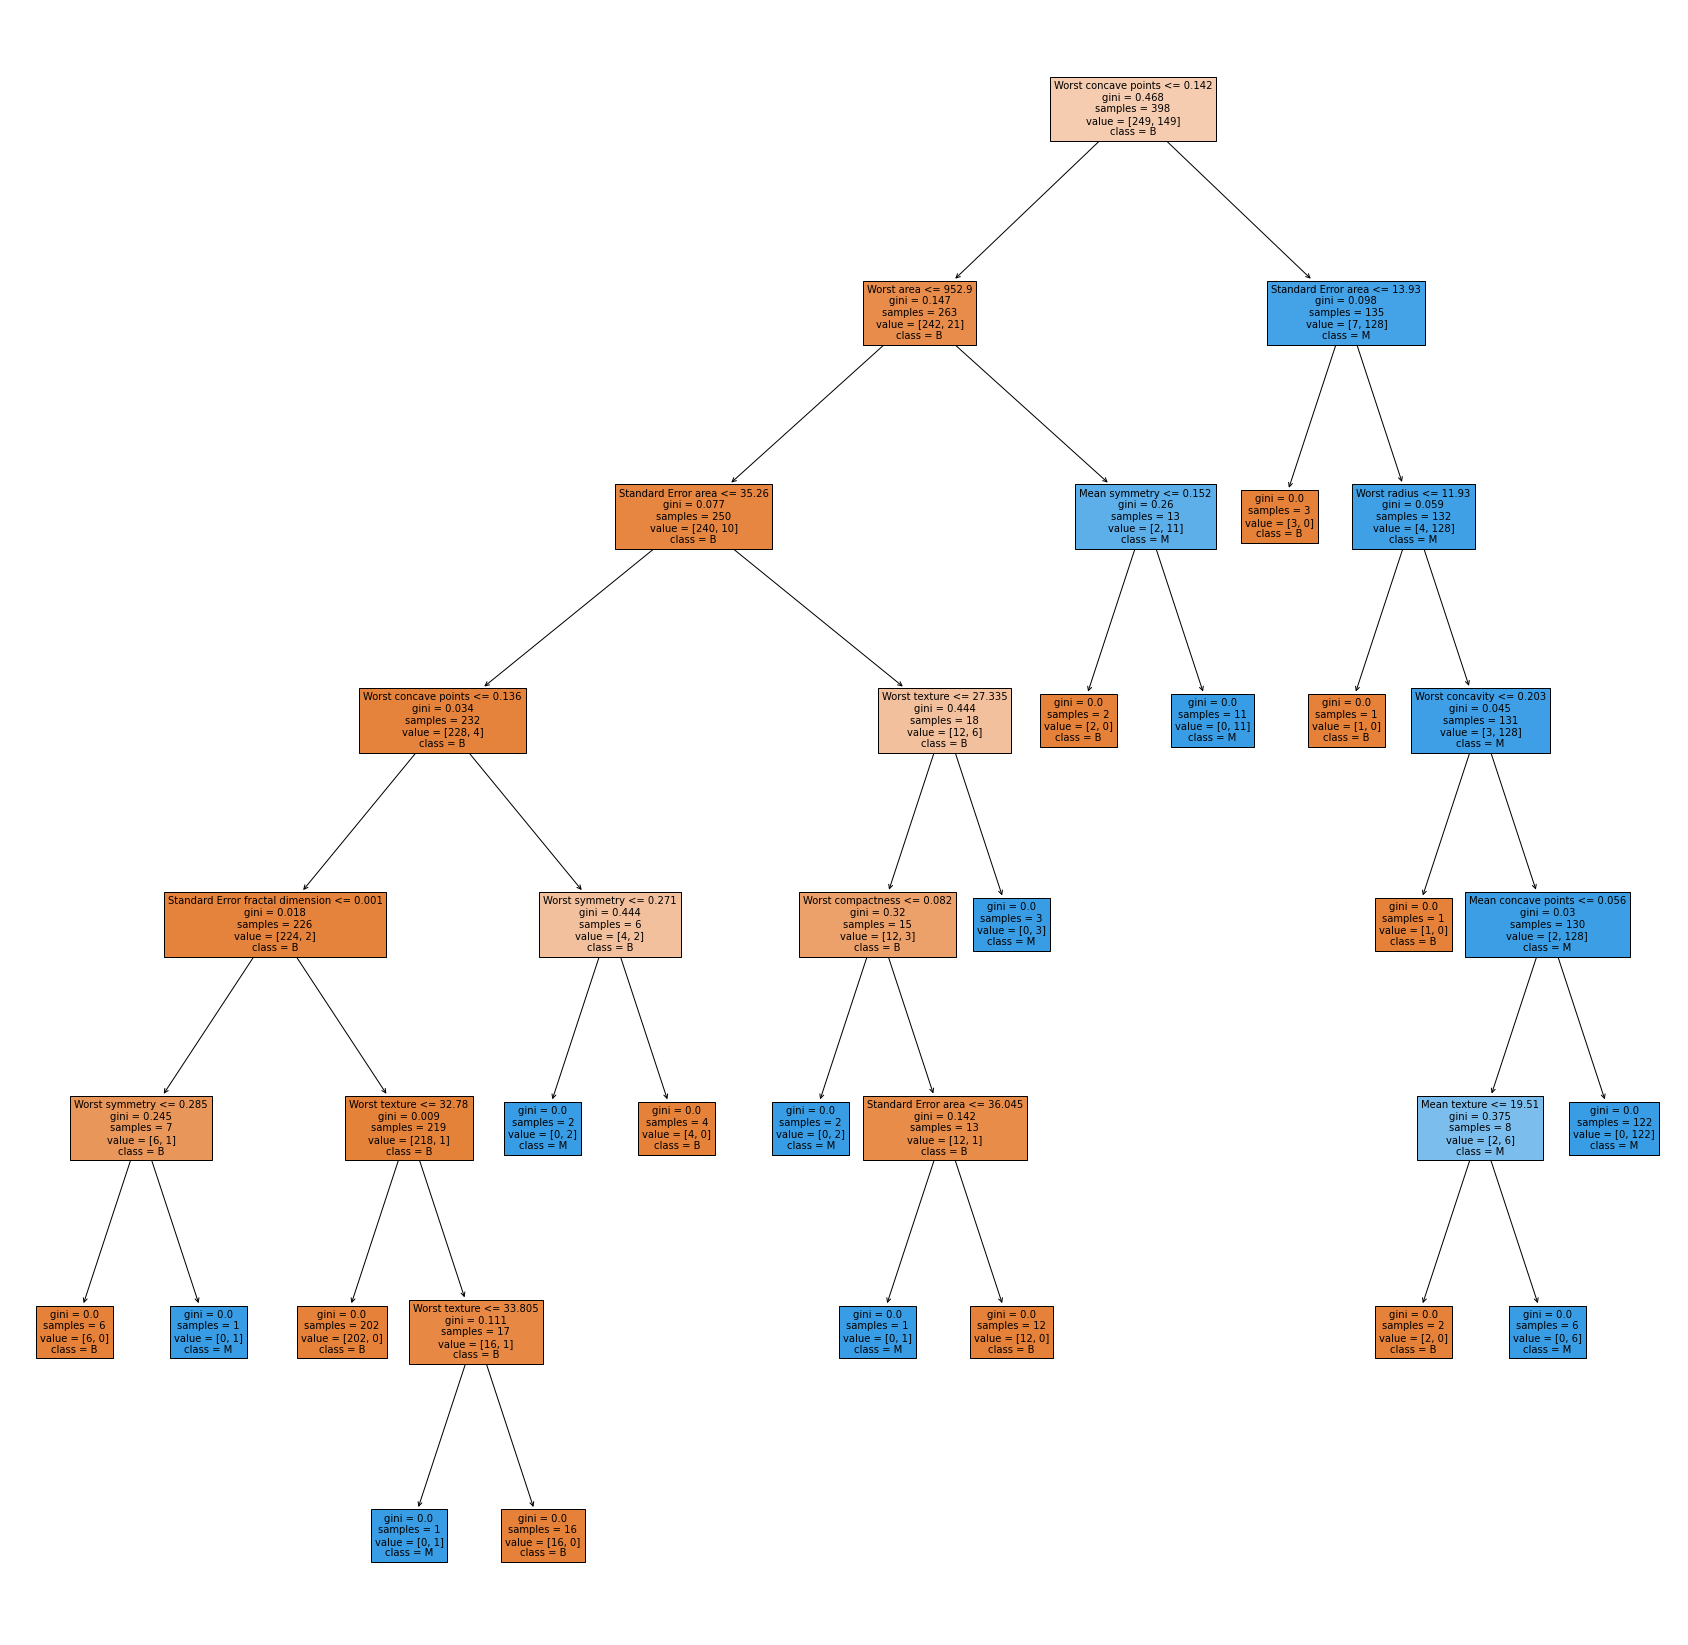

In [4]:
gini = DecisionTreeClassifier(criterion="gini",random_state=54).fit(trainx,trainy)
fig = plt.figure(figsize=(30,30))
_ = plot_tree(gini,
              feature_names=list(X.columns),
              class_names=gini.classes_,
              fontsize=10,
                   filled=True)

En una primera visión del árbol generado por gini comprobamos que su profundidad es de 7, visualizemos la de entropy para ver si puede optimizar este parámetro:

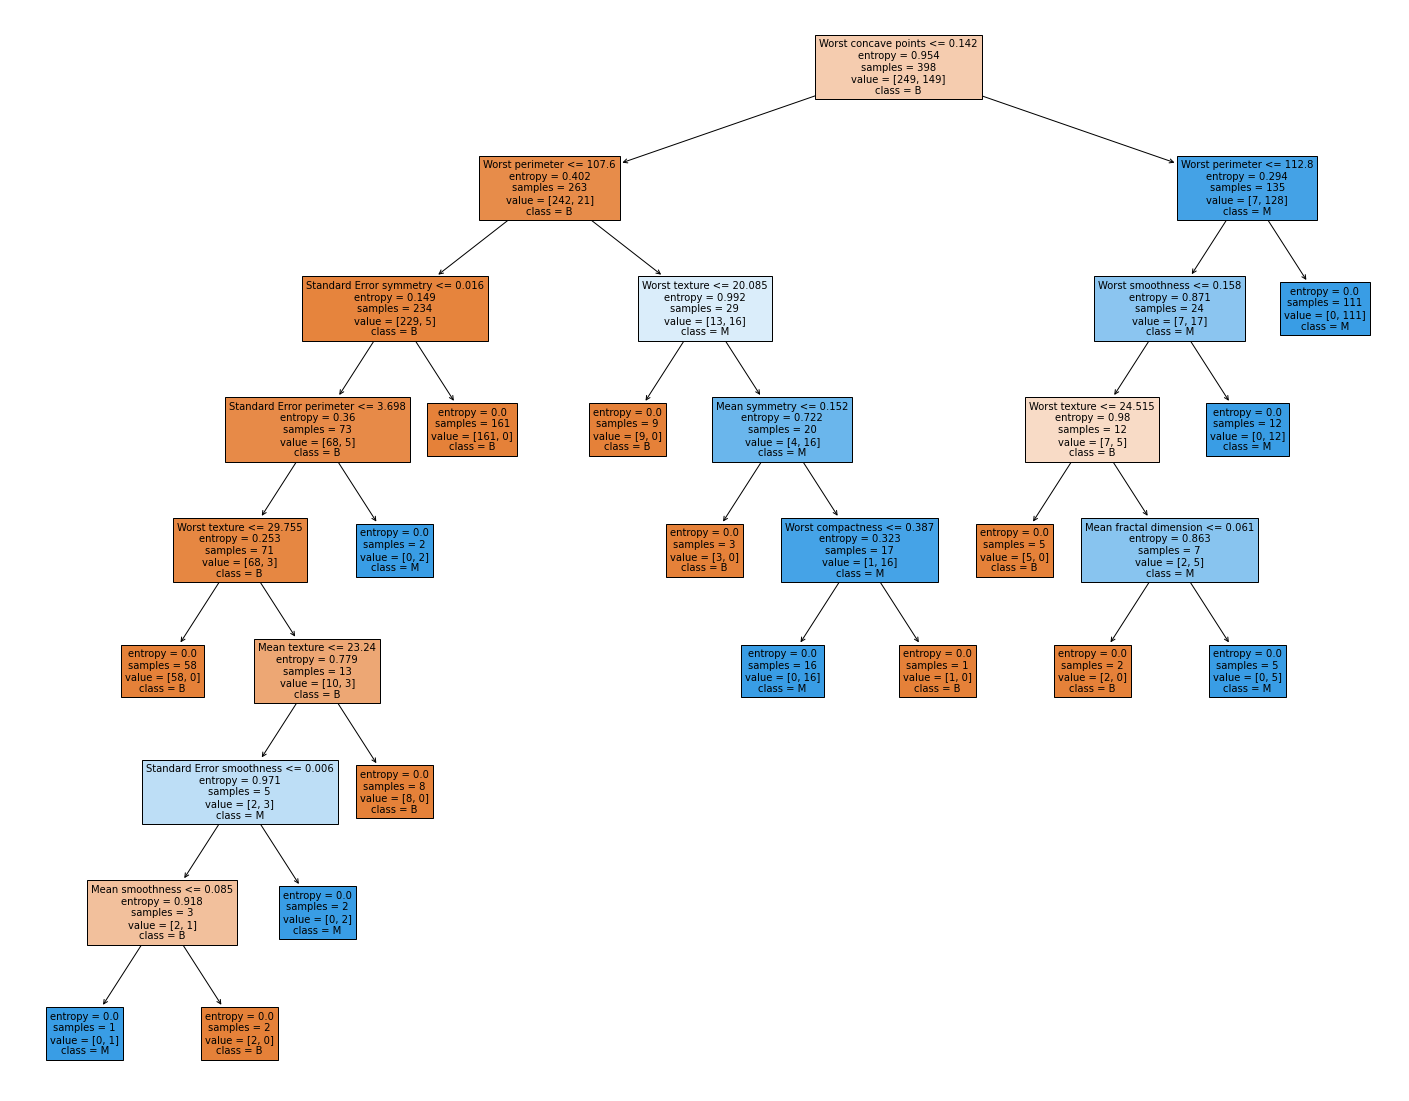

In [5]:
entro = DecisionTreeClassifier(criterion="entropy",random_state=54).fit(trainx,trainy)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(entro,
              feature_names=list(X.columns),
              class_names=entro.classes_,
              fontsize=10,
              filled=True)

No ha mejorado este parámetro, pero lo más importante es su precisión que medimos a continuación:

In [6]:
print("La precisión de gini es: " + str(accuracy_score(testy, gini.predict(testx))))
print("La precisión de entropy es: " + str(accuracy_score(testy, entro.predict(testx))))

La precisión de gini es: 0.9298245614035088
La precisión de entropy es: 0.935672514619883


Como podemos comprobar, entropy supera por muy poco la precisión de gini, convirtiéndolo el mejor criterio para estos datos.

### Mejor característica

Una vez el criterio ha ordenado y seleccionado las mejores características, podemos seleccionarlas por el orden que nos deja o hacerlo de forma aleatoria:

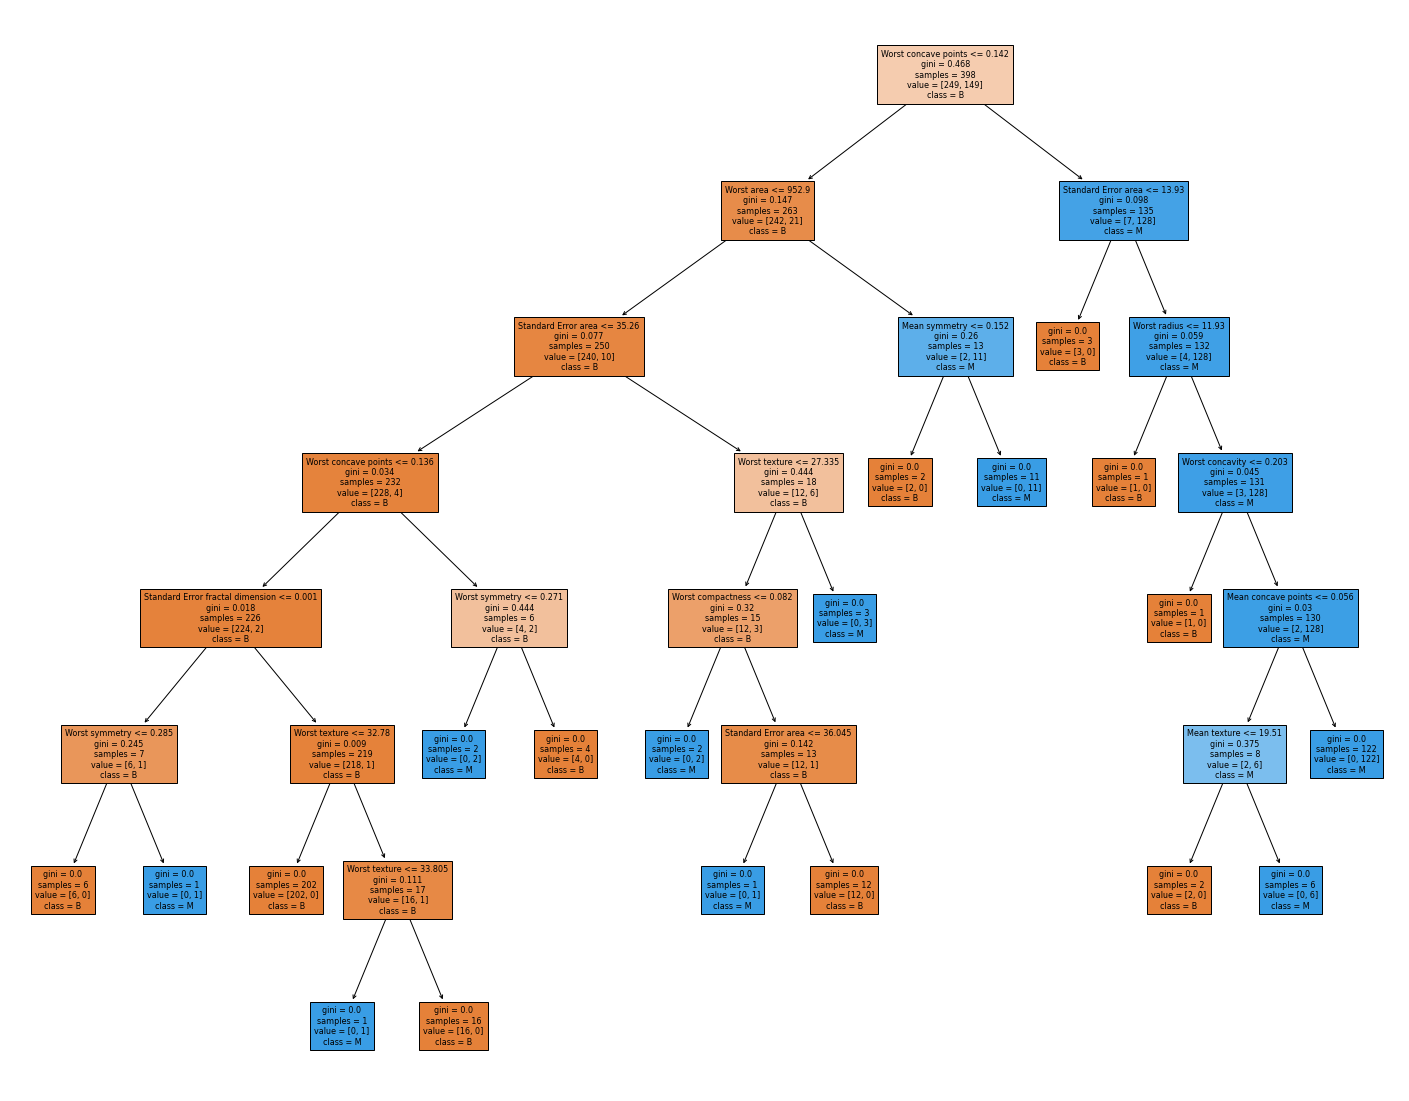

In [7]:
best = DecisionTreeClassifier(splitter="best",random_state=54).fit(trainx,trainy)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best,
              feature_names=list(X.columns),
              class_names=best.classes_,
              fontsize=8,
              filled=True)

El árbol seleccionado con características best no se diferencia tanto de los anteriores, comprobemos que sucede si seleccionamos las características de forma aleatoria:

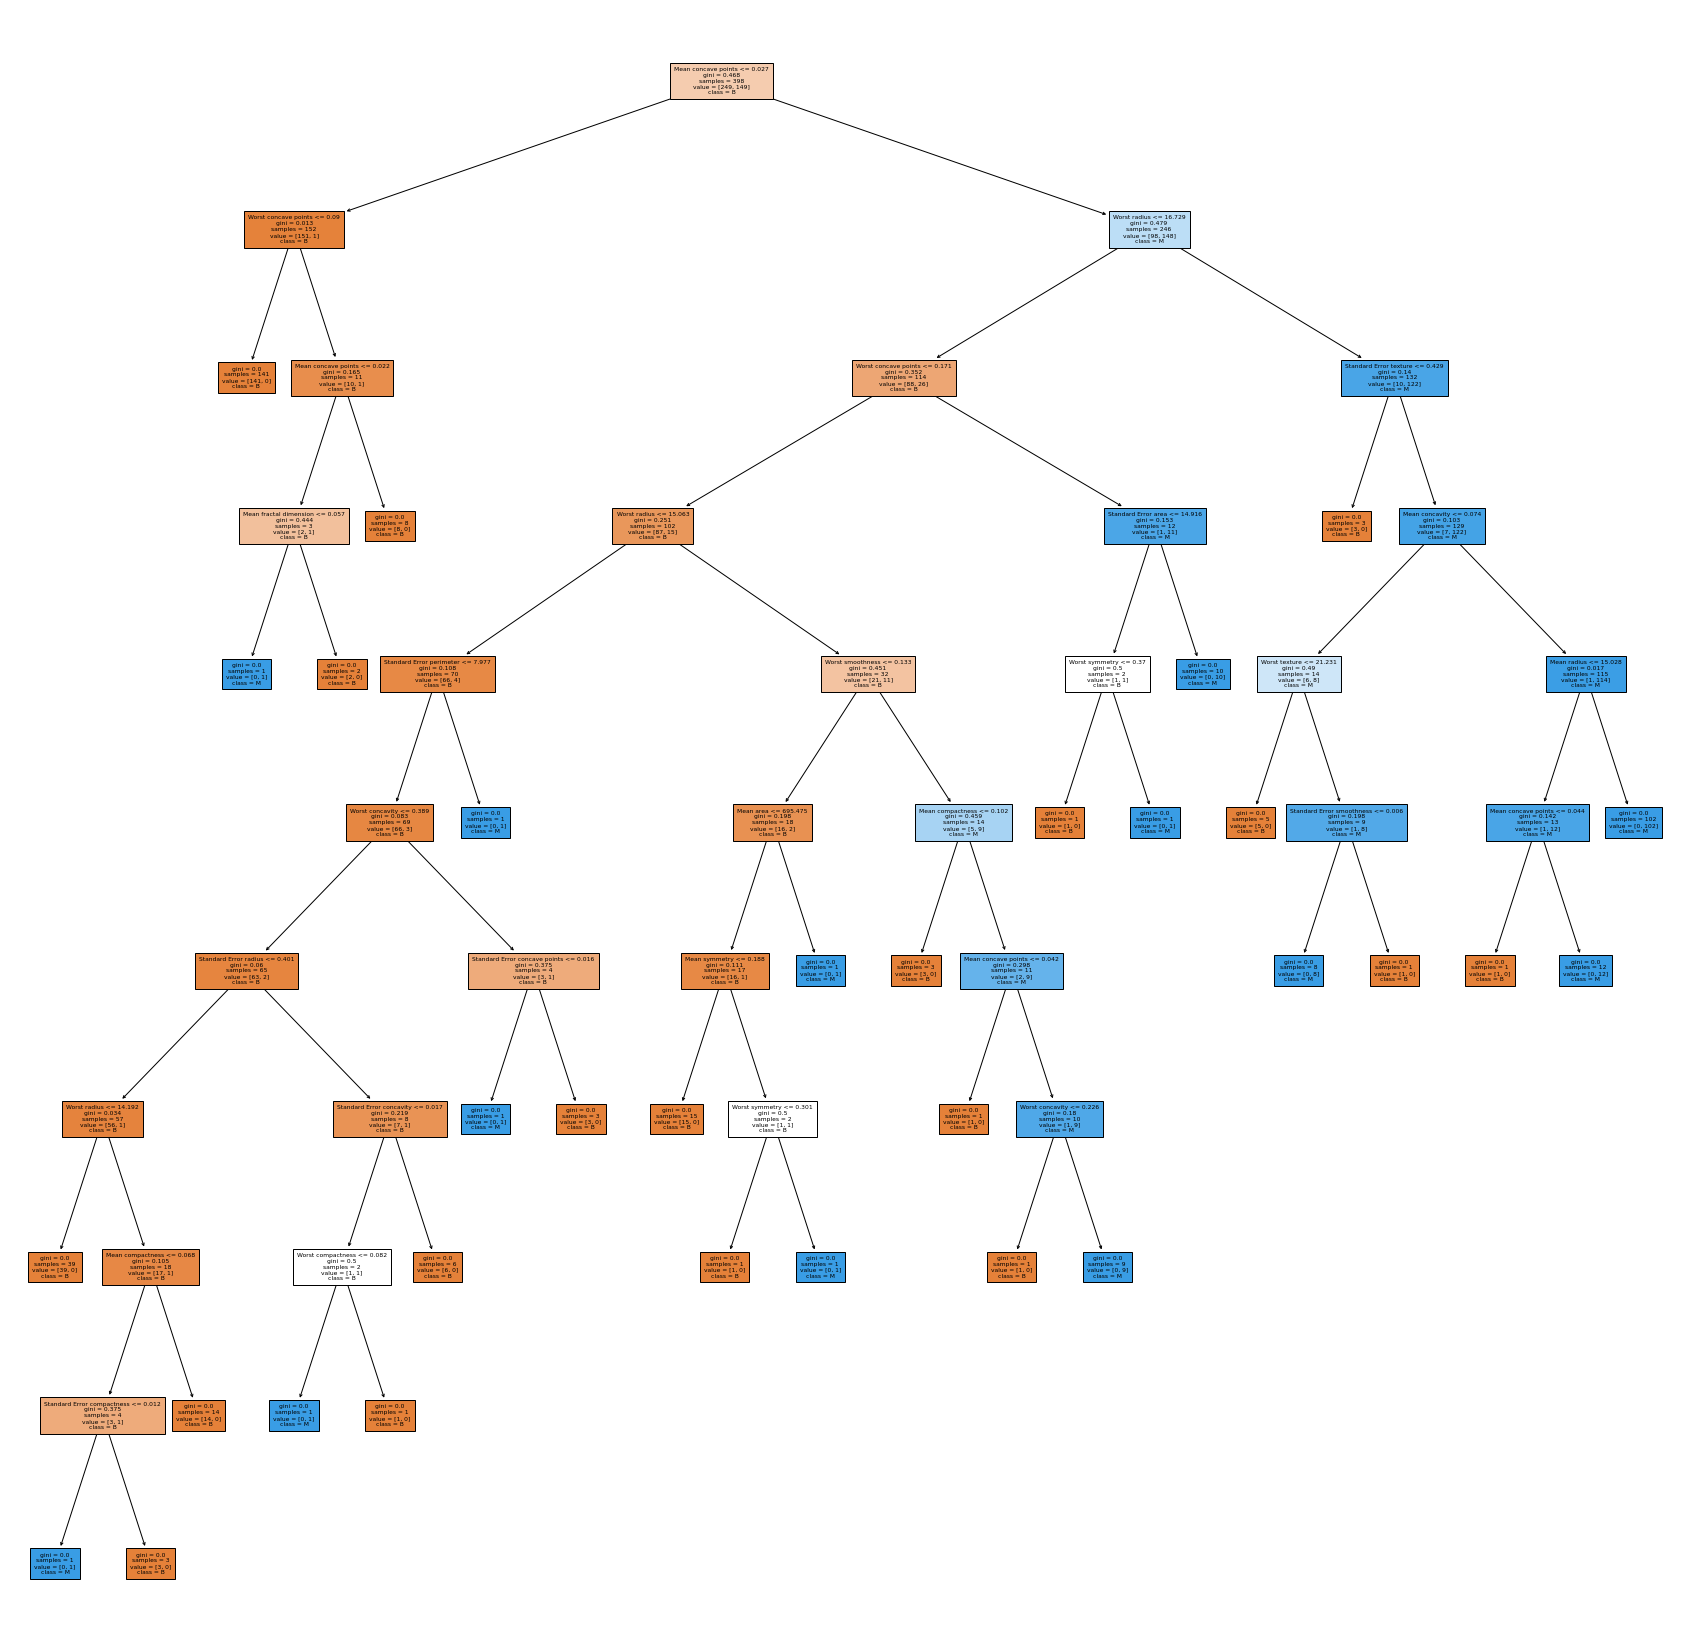

In [8]:
random = DecisionTreeClassifier(splitter="random",random_state=54).fit(trainx,trainy)
fig = plt.figure(figsize=(30,30))
_ = plot_tree(random,
              feature_names=list(X.columns),
              class_names=random.classes_,
              fontsize=6,
              filled=True)

Con las características ordenadas se crea un modelo menos eficiente de mayor profundidad y mayor número de nodos, sin embargo, es importante conocer la precisión:

In [9]:
print("La precisión de best es: " + str(accuracy_score(testy, best.predict(testx))))
print("La precisión de random es: " + str(accuracy_score(testy, random.predict(testx))))

La precisión de best es: 0.9298245614035088
La precisión de random es: 0.9239766081871345


Prácticamente son idénticas, convirtiéndo al método best, en un mejor método dado que consigue una solución ligeramente mejor con menos nodos.

Por otro lado, ¿que tanto afecta la profundidad a nuestra precisión? a mayor profundidad es más costoso por lo que disminuirla es ideal por ello.

In [10]:
df_depth = pd.DataFrame({'depth': [],
                   'gini_accuracy': [],
                   'entropy_accuracy': []})

for depth in list(range(1,8)):
    df_depth.loc[len(df_depth.index)] = [str(depth),
                                         str(round(accuracy_score(testy, DecisionTreeClassifier(criterion="gini",max_depth=depth,random_state=54).fit(trainx,trainy).predict(testx)),3)),
                                         str(round(accuracy_score(testy, DecisionTreeClassifier(criterion="entropy",max_depth=depth,random_state=54).fit(trainx,trainy).predict(testx)),3))]
df_depth

,depth,gini_accuracy,entropy_accuracy
0,1,0.895,0.895
1,2,0.947,0.912
2,3,0.947,0.953
3,4,0.947,0.947
4,5,0.936,0.936
5,6,0.936,0.918
6,7,0.93,0.93


Como podemos comprobar, podríamos disminuir la profundidad a 5, y daría mejores o los mismo resultados que los actuales.

### Tarea 2
La construcción de un árbol de decisión supone seleccionar en cada nodo la mejor característica para dividir el conjunto de muestras que llega a dicho nodo de forma que se minimice una determinada medida de impureza. Por lo tanto, aquellas características que no se incluyen en el árbol final se pueden suponer que no aportan información para la clasificación. De esta forma, se puede considerar la construcción de un árbol de decisión como un método de selección de características. La clase DecisionTreeClassifier posee el atributo feature_importances_ que da una medida de la importancia de las características en el árbol de decisión generado, siendo 0 para aquellas características no utilizadas.

A continuación elijo las características por el criterio gini, y otra por el criterio mutual_info_classif, de la función SelectKBest para comparar los resultados:


In [25]:
gini = DecisionTreeClassifier(criterion="gini",random_state=54).fit(trainx,trainy)
features = gini.feature_importances_
features_tree = trainx.iloc[:,list(np.where(features >0)[0])]
test_features_tree = testx.iloc[:,list(np.where(features >0)[0])]
features_tree

,Mean texture,Mean concave points,Mean symmetry,Standard Error area,Standard Error fractal dimension,Worst radius,Worst texture,Worst area,Worst compactness,Worst concavity,Worst concave points,Worst symmetry
478,14.59,0.01969,0.1779,14.340,0.003614,12.400,21.90,467.6,0.20100,0.25960,0.07431,0.2941
303,18.61,0.01780,0.1482,10.080,0.003317,11.060,24.54,375.4,0.10440,0.08423,0.06528,0.2213
155,17.94,0.02331,0.1970,16.510,0.002484,13.590,25.22,564.2,0.17880,0.19430,0.08211,0.3113
186,18.58,0.05814,0.1621,28.920,0.001087,21.310,26.36,1410.0,0.24450,0.35380,0.15710,0.3206
101,13.43,0.00000,0.1930,9.833,0.004100,7.930,19.54,185.2,0.12020,0.00000,0.00000,0.2932
...,...,...,...,...,...,...,...,...,...,...,...,...
277,19.98,0.05843,0.1550,36.740,0.001676,19.960,24.30,1236.0,0.11600,0.22100,0.12940,0.2567
9,24.04,0.08543,0.2030,23.940,0.010080,15.090,40.68,711.4,1.05800,1.10500,0.22100,0.4366
359,18.32,0.01406,0.1506,30.480,0.002713,12.020,25.02,439.6,0.10490,0.11440,0.05052,0.2454
192,18.22,0.00000,0.1653,21.690,0.001688,9.968,20.83,303.8,0.02729,0.00000,0.00000,0.1909


Ha disminuido el conjunto de características de 30 a 12.

In [14]:
log = LogisticRegression()
log.fit(features_tree,trainy)
accuracy_score(testy,log.predict(test_features_tree))

C:\Users\david\miniconda3\envs\AEDV\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9766081871345029

Con las características del criterio gini de los árboles de clasificación obtenemos un excelente 97% de precisión, comprobemos los resultados con el otro método de sklearn:

In [15]:
select = SelectKBest(score_func=mutual_info_classif,k=np.where(features >0)[0].size)
select.fit(trainx,trainy)
select_features = select.transform(trainx)
select_features_test = select.transform(testx)

log = LogisticRegression()
log.fit(select_features,trainy)
accuracy_score(testy,log.predict(select_features_test))

C:\Users\david\miniconda3\envs\AEDV\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

El resultado es de un 94%, por lo que el criterio gini ligeramente mejor.

### Tarea 3: Implementar Random Forest

A continuación implemento el modelo de clasificación Random Forest en otro módulo y lo testeo con los mismo datos del problema:

In [29]:
random_forests = BosqueAleatorio(num_arboles=200, criterio='gini', max_prof=None, max_caracteristicas='log2', num_muestras=200)
random_forests.fit(trainx,trainy)

print(1 - accuracy_score(testy, random_forests.predict(testx)))

0.05847953216374269


La tasa de error de clasificación es la proporción de muestras mal clasificadas, que se puede calcular con la inversa de la precisión, siendo en este caso de un 5.8%, una cifra bastante positiva.

### Tarea 4

Por último implemento también en la clase Apilado un modelo ensemble Stacking para problemas de clasificación. Que testeo con el mismo conjunto de datos. La diferencia es que esta vez debo transformar las etiquetas para que pueda funcionar con estos modelos:

In [4]:
encoder = LabelEncoder().fit(trainy)

new_trainy = encoder.transform(trainy)
new_testy = encoder.transform(testy)

apil = Apilado([Perceptron(),SVC()],LogisticRegression())
apil.fit(trainx,new_trainy)
print(1 - accuracy_score(new_testy, apil.predict(testx)))

0.052631578947368474


La tasa de error es muy parecida a la anterior, convirtiendo este modelo en uno bastante decente.